In [44]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Percentiles

In [45]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)
x

array([43, 20, 51,  7, 28, 34])

In [46]:
# Step 1. Sort the data

np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [47]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

In [48]:
percentile(55, x)

34

In [49]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

34

In [50]:
np.sort(x)
percentile(50, x)

28

(back to slides)
## Percentiles questions

In [51]:
s= [1, 7, 3, 9, 5]
np.sort(s)

array([1, 3, 5, 7, 9])

In [52]:
#1 
percentile(10, s) == 0, percentile(10, s)

(False, 1)

In [53]:
# 2 
percentile(39, s) == percentile(40, s)
#percentile(39, s), percentile(40, s)

True

In [54]:
# 3
percentile(40, s) == percentile(41, s), percentile(41, s) 

(False, 5)

In [55]:
# 4
percentile(50, s) == 5 

True

# Estimation

### Sample Median

In [56]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)
sf.num_rows, sf.num_columns

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


(42989, 22)

In [57]:
# Check if total compensation = total+beneifts + total+slary
tmp_sf = sf.select("Total Compensation", "Total Benefits", "Total Salary")
tmp_sf

Total Compensation,Total Benefits,Total Salary
117767,35620.8,82146
41209.8,7221.93,33987.9
110561,33492.2,77069
38625,9431.65,29193.3
11438.2,3489.41,7948.75
3188.65,953.65,2235
260281,61329.9,198951
111057,37785.3,73271.8
186781,50029.3,136752
103610,31340.3,72269.3


In [58]:
np.count_nonzero(tmp_sf.column(1) + tmp_sf.column(2) == tmp_sf.column(0))

34053

**Question:** What is this dataset?

In [59]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


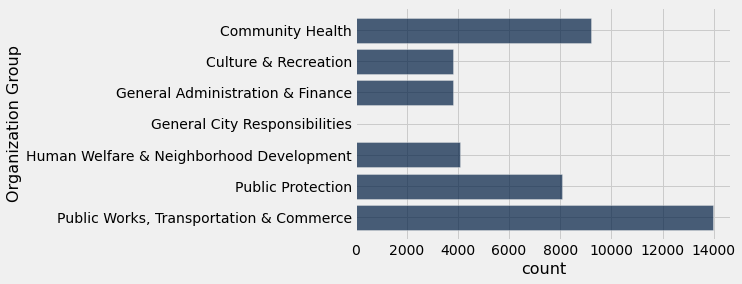

In [60]:
salary_sf.group(0).barh(0)

**Question:** Who is making the most money?

In [61]:
max_comp = max(salary_sf.column('Total Compensation'))
salary_sf.where('Total Compensation', max_comp)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,648875


**Question:** Who is making the least money?

In [62]:
min_comp = min(salary_sf.column('Total Compensation'))
salary_sf.where('Total Compensation', min_comp)

Organization Group,Job,Total Compensation
Public Protection,Firefighter,-423.76


**Question:** How many people are making less than $10,400 a year?

In [63]:
salary_sf.where('Total Compensation', are.below(10400)).show()
10 * 20 * 52

Organization Group,Job,Total Compensation
Public Protection,Police Officer,3188.65
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,2093.7
Culture & Recreation,Public Service Trainee,4268.2
Culture & Recreation,Camp Assistant,7179.16
Human Welfare & Neighborhood Development,Public Service Trainee,3198.95
"Public Works, Transportation & Commerce",School Crossing Guard,3590.62
Culture & Recreation,Recreation Leader,129.63
Public Protection,Emergency Services Assistant,1359.17
Culture & Recreation,Public Service Trainee,4390.65
Public Protection,Deputy Sheriff,9027.67


10400

**Question:** What is the typical salary? Should we compute the mean or median for this?

In [64]:
# answer below
np.mean(salary_sf.column('Total Compensation')), np.median(salary_sf.column('Total Compensation'))











(98605.35672032379, 98174.9)

In [65]:
percentile(50, salary_sf.column('Total Compensation'))

98174.9

In [66]:
# skip

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [67]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

98174.9

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


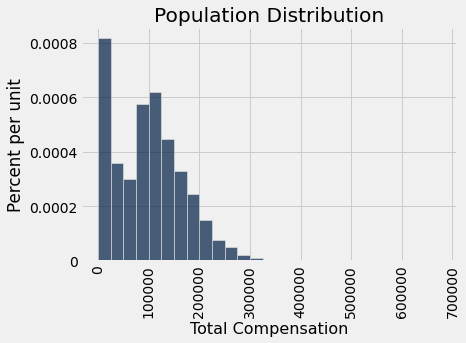

In [68]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

*Zoom poll*

In [69]:
np.mean(salary_sf.sample(50, with_replacement=False).column('Total Compensation'))

85077.2208

In [70]:
pop_median

98174.9

In [71]:
# skip
#skip










In [72]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,7199,117415,92.32,2190.73,119698,24004.5,12368.4,9590.91,45963.8,165662
Calendar,2015,6,General Administration & Finance,TIS,General Services Agency - Technology,790,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",1844,Senior Management Assistant,51941,52905,0,0,52905,11691.5,7167.99,4387.51,23247,76152
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,594,56510.1,4617.29,792.16,61919.5,15687.4,11117.3,4822.29,31627,93546.5
Calendar,2015,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,261,"Laborers, Local 261",7500,Semi-Skilled & General Labor,7514,General Laborer,22386,63887,2072.81,1439.11,67398.9,13474.3,12424.5,5563.68,31462.5,98861.5
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8214,Parking Control Officer,1689,0,0,4261.87,4261.87,0,0,326.04,326.04,4587.91


In [73]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

100899.36

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


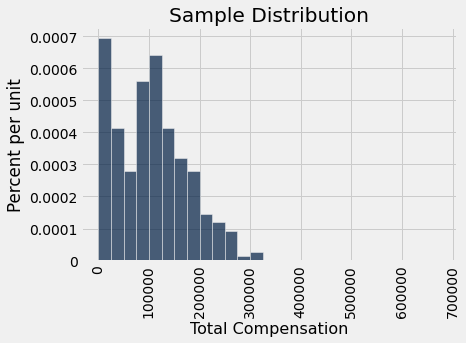

In [74]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

In [75]:
pop_median, estimate_median, abs(pop_median - estimate_median)

(98174.9, 100899.36, 2724.4600000000064)

(back to slides)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [76]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size-number from the sf table"""
    # Question: sample with or without replacement?
    return percentile(50, salary_sf.sample(samp_size, with_replacement=False).column('Total Compensation'))

sample_median = generate_sample_median(300)
sample_median

94874.64

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>



In [77]:
error = abs(pop_median - sample_median)
error

3300.2599999999948

In [78]:
error = abs(pop_median - generate_sample_median(300))
error

2737.920000000013

In [79]:
errors = make_array()

for i in np.arange(1e4):
    sample_median = generate_sample_median(300)
    error = pop_median - sample_median
    errors = np.append(errors, error)
    
len(errors)

10000

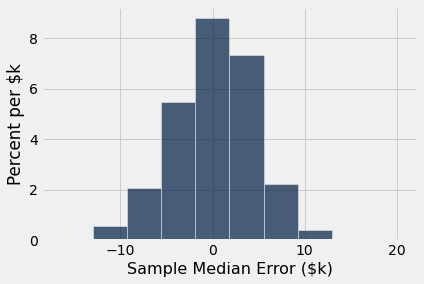

In [80]:
Table().with_column("Sample Median Error", errors / 1000).hist(unit="$k")

In [81]:
300 * 1000

300000

(back to slides)
# Quantifying Uncertainty

In [82]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

array([104425.74,  95262.85,  93364.85,  98975.54,  97452.13, 101321.72,
       107941.67,  98221.36, 100222.71, 102679.17,  99441.07,  99110.2 ,
        99032.6 ,  95393.47,  94573.17,  96491.44, 101849.65, 102321.25,
        92520.52, 102759.35,  97818.12, 106841.1 ,  93131.59,  92108.06,
        98795.01, 107363.84, 100776.52,  95383.77,  96410.93,  95471.79,
       100968.08, 101626.56, 101893.84,  94919.61,  98499.69,  97814.75,
       100617.96,  98554.29,  88995.53,  92108.06, 100130.  ,  97331.12,
        97723.78,  96224.19, 106279.16,  97766.78,  96425.11,  98639.08,
        91707.2 ,  99933.65,  92760.46,  93692.71, 102430.93,  91643.31,
        97929.45, 104716.57, 100335.24,  91720.35, 102988.95,  98707.88,
       104707.79,  95595.45,  94376.26,  98349.02,  98489.51,  98350.61,
       100448.29,  90586.06,  96008.94,  95894.69,  98294.44, 105137.34,
       105241.91, 106547.67,  99334.21,  94816.35,  98664.98, 103207.07,
       103050.99,  94401.34,  95511.41,  95453.26, 

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


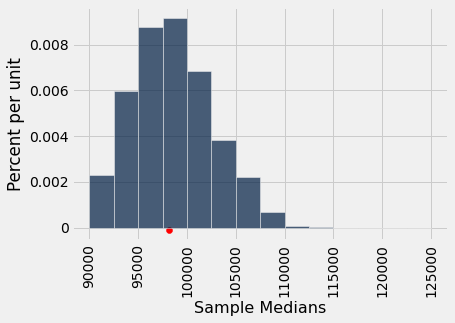

In [83]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


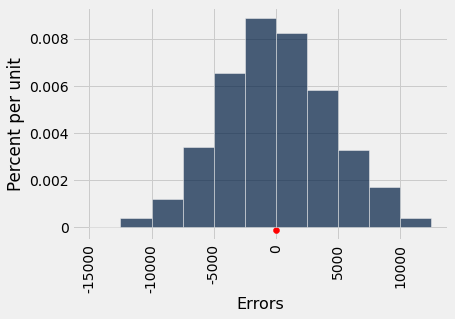

In [84]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

(back to slides)
# Bootstrap

In [85]:
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,7199,117415,92.32,2190.73,119698,24004.5,12368.4,9590.91,45963.8,165662
Calendar,2015,6,General Administration & Finance,TIS,General Services Agency - Technology,790,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",1844,Senior Management Assistant,51941,52905,0,0,52905,11691.5,7167.99,4387.51,23247,76152
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,594,56510.1,4617.29,792.16,61919.5,15687.4,11117.3,4822.29,31627,93546.5
Calendar,2015,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,261,"Laborers, Local 261",7500,Semi-Skilled & General Labor,7514,General Laborer,22386,63887,2072.81,1439.11,67398.9,13474.3,12424.5,5563.68,31462.5,98861.5
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8214,Parking Control Officer,1689,0,0,4261.87,4261.87,0,0,326.04,326.04,4587.91
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,9174,"Manager IV, MTA",51360,26205,0,0,26205,5749.4,2389.33,3365.69,11504.4,37709.4
Calendar,2015,2,"Public Works, Transportation & Commerce",PRT,Port,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,42019,30450.7,0,0,30450.7,6830.13,5172.89,2467.84,14470.9,44921.6
Calendar,2015,1,Public Protection,FIR,Fire Department,790,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",1822,Administrative Analyst,17723,77060.5,0,0,77060.5,15853.5,12424.5,6379.43,34657.4,111718
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,11313,45733.7,10196.9,7977.59,63908.2,14348.4,9094.97,4704.95,28148.3,92056.5
Calendar,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3632,Librarian 2,20467,95321.2,0,1214.44,96535.7,19878.7,12472.3,7945.31,40296.3,136832


In [98]:
# Take a bootstrap (re)sample of size 300, WITH replacement

# Sample from our sample
boot_sample = our_sample.sample(with_replacement=True)
#boot_sample

In [99]:
our_sample_median = percentile(50, our_sample.column('Total Compensation'))

In [100]:
boot_sample_median = percentile(50, boot_sample.column('Total Compensation'))

Population Median =        98174.9
Our Sample Median =        100899.36
Bootstrap Sample Median =  107538.02


/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


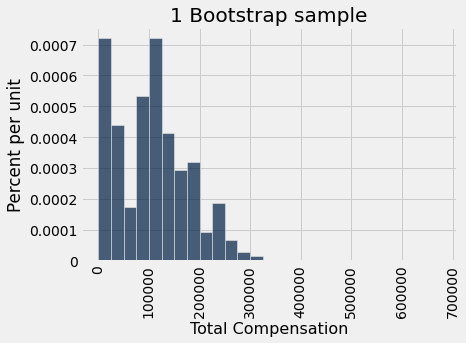

In [101]:
# Show the bootstrap sample 
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

### Multiple Bootstraps
Let's take 1k bootstraps. Lets start by implementing the following function

<details>
<summary>Solution</summary>
   single_sample = our_sample.sample()
   return percentile(50, single_sample.column('Total Compensation'))
</details>  

In [102]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

Now let's keep track of 1k bootstrapped median

In [ ]:
# Bootstrap our sample 1000 times
bootstrap_medians = ...
for i in np.arange(1000):
    new_median = ...
    bootstrap_medians = ...

Let's visualize these bootstrapped medians

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

# 95% Confidence Interval

**Question**: How could we make an interval based on the middle 95% of bootstrap samples?

- *Hint 1:* Remember we stored the bootstrapped medians in an array called `bootstrap_medians`
- *Hint 2:* What did we learn about in the begining of this lecture?


<details>
<summary>Solution</summary>
  left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
</details>  

In [ ]:
# Make an interval based on the middle 95% of bootstrap samples

left = ...
right = ...

Let's now run the code below to plot the confidence interval

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [ ]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

What is the mean age?

In [ ]:
mean_age = ...
mean_age

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [ ]:
def one_bootstrap_mean():
    return ...

Let's compute 1k bootstrapped samples

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

Now let's plot the bootstrapped means

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');